# Playing with Data in Jupyter/Python

Here's a notebook to play with the light sensor data you are storing in your database.

First let's connect to the database: 

In [1]:
from pymongo import MongoClient as mc
cli = mc("172.18.0.2")
#make sure your mongo ip is represented correctly


Now, let's get a list of our collections

In [2]:
dbs = cli.list_database_names()
db = cli[dbs[0]]
col = db[db.list_collection_names()[0]]

Import pandas to have a straightforward interface to the data:

In [3]:
import pandas as pd
import time

Structure a query to only get the last two hours of data

In [4]:
q = {'time':{'$gt':time.time()-2*60*60}} #2 * 60 minutes * 60 seconds = 2 hour

Pull one hour of data into a data frame

In [5]:
df = pd.DataFrame(list(col.find(q)))

import libaries for ploting and manipulating data

In [6]:
import sys
sys.path.append("/pithy/code")
from pithy import *
%matplotlib inline

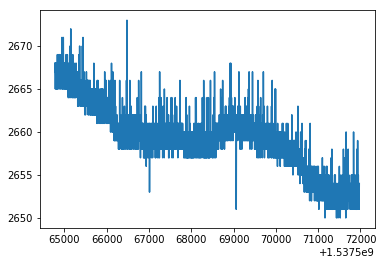

In [7]:
plot(df['time'],df['L'])

This plot isn't all that helpful. While unix time is great for computers, it's awful for people.Also, labels. Also, y range.

Text(0,0.5,'Intensity (arb)')

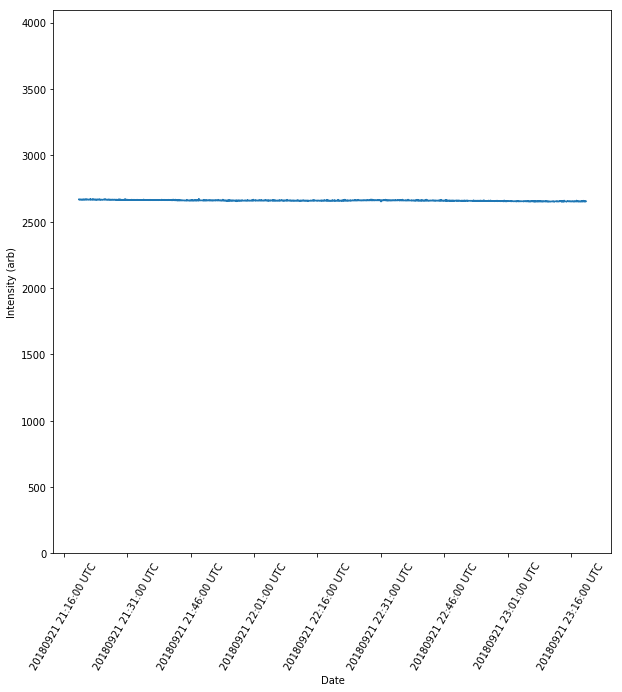

In [8]:
import matplotlib.dates as mdates
figure(figsize=(10, 10))
df['date'] = pd.to_datetime(df['time'],unit='s')
plot(df['date'],df['L'])
xticks(rotation=60)
xax = plt.gca().get_xaxis()
# format major xtick label
xax.set_major_formatter(mdates.DateFormatter('%Y%m%d %H:%M:%S %Z'))
# show plot
#plt.show()
ylim(0,4096)
xlabel("Date")
ylabel("Intensity (arb)")

